# Initial data analysis

**Date:** 4/5/2020  
**Author:** Charles Farr

The script below does the following:
1. Imports raw data generated by the data_preparation_v2.ipynb
1. Runs an analysis on 20 subsets of the data - 1 per CBSA
1. Outputs analysis results for each subset to readable formats for review by remainder of team

# Import packages / set global variables

In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns

import statsmodels.api as sm
from sklearn import linear_model

import statsmodels.formula.api as smf

# %matplotlib inline

In [2]:
# setting directories for data i/o

data_directory = 'C:/Users/charl/Documents/CNT 2020/Evictions/cnt-evictions/data/'
export_directory = 'C:/Users/charl/Documents/CNT 2020/Evictions/cnt-evictions/analysis/exports/'

analysis_data_file_name = 'joined_analysis_df_20200405_0000.csv'

In [3]:
# updating pandas view settings

pd.set_option('display.max_columns', 999)

export_files = False

# Import cleaned data analysis dataset

In [4]:
analysis_df = pd.read_csv(data_directory+analysis_data_file_name, low_memory=False)

In [5]:
analysis_df.head()

,Unnamed: 0,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


In [8]:
analysis_df.columns

Index(['blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',

In [9]:
analysis_df.drop(['Unnamed: 0'], axis=1, inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [10]:
analysis_df.head()

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


In [11]:
test_columns = ['blkgrp', 'cbsa', 'state', 'GEOID', 'year', 'name', 'parent-location', 'evictions', 'eviction-rate', 'eviction-filing-rate']

In [12]:
analysis_df[test_columns].count()

blkgrp                  77993
cbsa                    77993
state                   77993
GEOID                   77993
year                    77993
name                    77993
parent-location         77993
evictions               65005
eviction-rate           65005
eviction-filing-rate    65005
dtype: int64

In [13]:
analysis_df[test_columns].nunique()

blkgrp                  77993
cbsa                       20
state                      22
GEOID                   77993
year                        1
name                    52441
parent-location           198
evictions                 153
eviction-rate            1713
eviction-filing-rate     4133
dtype: int64

In [14]:
analysis_df.groupby(['cbsa','state'])['blkgrp'].count()

cbsa                                          state
Atlanta-Sandy Springs-Roswell, GA             ga       2597
Baltimore-Columbia-Towson, MD                 md       1945
Boston-Cambridge-Newton, MA-NH                ma       3156
                                              nh        258
Chicago-Naperville-Elgin, IL-IN-WI            il       5974
                                              in        484
                                              wi        127
Dallas-Fort Worth-Arlington, TX               tx       4163
Detroit-Warren-Dearborn, MI                   mi       3694
Houston-The Woodlands-Sugar Land, TX          tx       3018
Los Angeles-Long Beach-Anaheim, CA            ca       8243
Miami-Fort Lauderdale-West Palm Beach, FL     fl       3416
Minneapolis-St. Paul-Bloomington, MN-WI       mn       2298
                                              wi         72
New York-Newark-Jersey City, NY-NJ-PA         nj       4711
                                              ny

# Build & test analysis script for 1 subset

Working off of the following links:
- https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
- https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9

### Exploring the Data

In [15]:
analysis_df.columns

Index(['blkgrp', 'cbsa', 'blkgrps', 'population_x', 'households', 'land_acres',
       'ht_ami', 'ht_80ami', 'ht_nmi', 'h_ami', 'h_80ami', 'h_nmi', 't_ami',
       't_80ami', 't_nmi', 'co2_per_hh_local', 'co2_per_acre_local',
       'autos_per_hh_ami', 'autos_per_hh_80ami', 'autos_per_hh_nmi',
       'vmt_per_hh_ami', 'vmt_per_hh_80ami', 'vmt_per_hh_nmi',
       'pct_transit_commuters_ami', 'pct_transit_commuters_80ami',
       'pct_transit_commuters_nmi', 't_cost_ami', 't_cost_80ami', 't_cost_nmi',
       'auto_ownership_cost_ami', 'auto_ownership_cost_80ami',
       'auto_ownership_cost_nmi', 'vmt_cost_ami', 'vmt_cost_80ami',
       'vmt_cost_nmi', 'transit_cost_ami', 'transit_cost_80ami',
       'transit_cost_nmi', 'transit_trips_ami', 'transit_trips_80ami',
       'transit_trips_nmi', 'compact_ndx', 'emp_ovrll_ndx', 'res_density',
       'gross_hh_density', 'hh_gravity', 'frac_sfd', 'emp_gravity', 'emp_ndx',
       'block_size', 'intersection_density', 'avg_block_perimeter_meters',

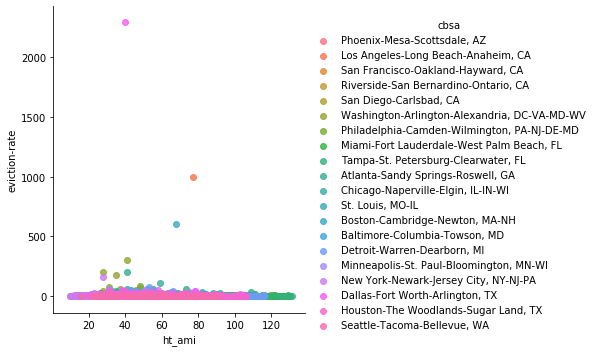

In [16]:
# Review the data to identify outliers

sns.lmplot("ht_ami", "eviction-rate", data=analysis_df, hue="cbsa", fit_reg=False)

In [19]:
# Check where eviction rate count is > 100

analysis_df[test_columns].loc[analysis_df['eviction-rate']>100].count()

blkgrp                  23
cbsa                    23
state                   23
GEOID                   23
year                    23
name                    23
parent-location         23
evictions               23
eviction-rate           23
eviction-filing-rate    23
dtype: int64

In [20]:
# investigate data of blockgroups without NaN values for eviction-rate

analysis_df[test_columns].loc[analysis_df['evictions'].isna() != True].head(10)

,blkgrp,cbsa,state,GEOID,year,name,parent-location,evictions,eviction-rate,eviction-filing-rate
2704,6.037119e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037119e+10,2016,1190.02.5,"Los Angeles County, California",2.0,1.61,1.61
2705,6.037320e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037320e+10,2016,3200.1,"Los Angeles County, California",0.0,0.00,0.00
2706,6.037124e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037124e+10,2016,1240.1,"Los Angeles County, California",2.0,1.02,1.02
2707,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1347.10.2,"Los Angeles County, California",1.0,0.22,0.22
2708,6.037137e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037137e+10,2016,1372.01.3,"Los Angeles County, California",0.0,0.00,0.00
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, California",0.0,0.00,0.00
2710,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037543e+10,2016,5425.01.1,"Los Angeles County, California",7.0,2.05,2.05
2711,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037543e+10,2016,5432.01.2,"Los Angeles County, California",7.0,3.21,3.21
2712,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1351.11.1,"Los Angeles County, California",0.0,0.00,0.00
2713,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",ca,6.037135e+10,2016,1351.11.3,"Los Angeles County, California",0.0,0.00,0.00


In [23]:
# investigate data of blockgroups without NaN values for eviction-rate

analysis_df[test_columns].loc[analysis_df['evictions'].isna() != True].count()

blkgrp                  65005
cbsa                    65005
state                   65005
GEOID                   65005
year                    65005
name                    65005
parent-location         65005
evictions               65005
eviction-rate           65005
eviction-filing-rate    65005
dtype: int64

### Filtering out non-sensical numbers
Excluding blockgroups with that have both an eviciton rate > 100% and a 

In [24]:
# build dataset restricting data to eviction-rate < 100

analysis_filtered_df = analysis_df.loc[(analysis_df['eviction-rate']<=100) & (analysis_df['population_x']>0)].copy()

In [25]:
analysis_df[test_columns].count()

blkgrp                  77993
cbsa                    77993
state                   77993
GEOID                   77993
year                    77993
name                    77993
parent-location         77993
evictions               65005
eviction-rate           65005
eviction-filing-rate    65005
dtype: int64

In [28]:
analysis_df[test_columns].nunique()

blkgrp                  77993
cbsa                       20
state                      22
GEOID                   77993
year                        1
name                    52441
parent-location           198
evictions                 153
eviction-rate            1713
eviction-filing-rate     4133
dtype: int64

In [26]:
analysis_filtered_df[test_columns].count()

blkgrp                  64809
cbsa                    64809
state                   64809
GEOID                   64809
year                    64809
name                    64809
parent-location         64809
evictions               64809
eviction-rate           64809
eviction-filing-rate    64809
dtype: int64

In [27]:
analysis_filtered_df[test_columns].nunique()

blkgrp                  64809
cbsa                       18
state                      20
GEOID                   64809
year                        1
name                    45298
parent-location           163
evictions                 153
eviction-rate            1697
eviction-filing-rate     4110
dtype: int64

In [30]:
analysis_df['cbsa'].unique()

array(['Phoenix-Mesa-Scottsdale, AZ',
       'Los Angeles-Long Beach-Anaheim, CA',
       'San Francisco-Oakland-Hayward, CA',
       'Riverside-San Bernardino-Ontario, CA', 'San Diego-Carlsbad, CA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'Tampa-St. Petersburg-Clearwater, FL',
       'Atlanta-Sandy Springs-Roswell, GA',
       'Chicago-Naperville-Elgin, IL-IN-WI', 'St. Louis, MO-IL',
       'Boston-Cambridge-Newton, MA-NH', 'Baltimore-Columbia-Towson, MD',
       'Detroit-Warren-Dearborn, MI',
       'Minneapolis-St. Paul-Bloomington, MN-WI',
       'New York-Newark-Jersey City, NY-NJ-PA',
       'Dallas-Fort Worth-Arlington, TX',
       'Houston-The Woodlands-Sugar Land, TX',
       'Seattle-Tacoma-Bellevue, WA'], dtype=object)

In [29]:
analysis_filtered_df['cbsa'].unique()

array(['Los Angeles-Long Beach-Anaheim, CA',
       'San Francisco-Oakland-Hayward, CA',
       'Riverside-San Bernardino-Ontario, CA', 'San Diego-Carlsbad, CA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
       'Miami-Fort Lauderdale-West Palm Beach, FL',
       'Tampa-St. Petersburg-Clearwater, FL',
       'Atlanta-Sandy Springs-Roswell, GA',
       'Chicago-Naperville-Elgin, IL-IN-WI', 'St. Louis, MO-IL',
       'Boston-Cambridge-Newton, MA-NH', 'Detroit-Warren-Dearborn, MI',
       'Minneapolis-St. Paul-Bloomington, MN-WI',
       'New York-Newark-Jersey City, NY-NJ-PA',
       'Dallas-Fort Worth-Arlington, TX',
       'Houston-The Woodlands-Sugar Land, TX',
       'Seattle-Tacoma-Bellevue, WA'], dtype=object)

**Phoenix and Baltimore were removed from the analysis dataframe**

In [32]:
analysis_df.loc[analysis_df['cbsa'] == 'Phoenix-Mesa-Scottsdale, AZ'].head(5)

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,603.0,161.0,161.70,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.63,8.60,1.67,2.0,2.0,20079.0,17748.0,19925.0,3.0,4.0,3.0,12338.0,11151.0,12322.0,9106.0,8292.0,9115.0,3220.0,2846.0,3195.0,12.0,13.0,12.0,13.0,14.0,13.0,7.5,5.3,2.20,1.00,25032.0,55.0,14458.0,88.0,10.0,109.0,828,860.0,1039.0,742.0,40.0,60.0,az,4.013061e+10,2016,609.04.1,"Maricopa County, Arizona",603.0,19.27,123.0,60.25,742.0,33625.0,57300.0,18.1,34.83,0.83,60.36,0.00,0.00,0.00,0.00,3.98,NaN,NaN,NaN,NaN,0,0,0
1,4.013110e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2283.0,550.0,208.83,42.0,50.0,42.0,19.0,24.0,19.0,23.0,26.0,23.0,8.01,21.10,1.72,2.0,2.0,18699.0,16734.0,18581.0,6.0,7.0,6.0,12399.0,10982.0,12316.0,9379.0,8276.0,9315.0,2999.0,2683.0,2980.0,22.0,23.0,22.0,24.0,26.0,24.0,7.0,5.0,9.84,2.63,34717.0,70.0,36272.0,92.0,8.0,187.0,727,861.0,918.0,799.0,52.0,48.0,az,4.013110e+10,2016,1099.3,"Maricopa County, Arizona",2283.0,43.28,271.0,48.18,799.0,21959.0,55500.0,33.8,5.48,8.54,85.98,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
2,4.013061e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,824.0,220.0,117.03,52.0,62.0,52.0,27.0,33.0,27.0,25.0,29.0,25.0,11.31,21.25,1.86,2.0,2.0,22311.0,19998.0,22158.0,2.0,2.0,2.0,13682.0,12387.0,13645.0,10098.0,9174.0,10086.0,3578.0,3207.0,3553.0,6.0,6.0,6.0,7.0,7.0,7.0,5.7,2.2,3.44,1.88,18034.0,88.0,8027.0,87.0,9.0,283.0,1114,1191.0,1432.0,880.0,56.0,44.0,az,4.013061e+10,2016,610.32.4,"Maricopa County, Arizona",824.0,0.00,81.0,43.64,880.0,81250.0,157900.0,16.7,54.73,5.58,29.25,4.73,0.00,0.00,5.70,0.00,NaN,NaN,NaN,NaN,0,0,0
3,4.013217e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,201.0,130.0,72.82,58.0,68.0,57.0,34.0,42.0,34.0,24.0,26.0,24.0,5.01,8.94,1.76,2.0,2.0,20321.0,17604.0,20073.0,3.0,3.0,3.0,12837.0,11259.0,12708.0,9567.0,8425.0,9477.0,3259.0,2823.0,3219.0,12.0,11.0,12.0,13.0,12.0,13.0,5.9,7.1,28.33,1.79,24598.0,54.0,39081.0,91.0,5.0,220.0,707,1514.0,1514.0,NaN,88.0,12.0,az,4.013217e+10,2016,2169.01.3,"Maricopa County, Arizona",201.0,12.50,55.0,11.54,NaN,68194.0,283000.0,NaN,95.52,0.00,4.48,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,0,0,0
4,4.021001e+10,"Phoenix-Mesa-Scottsdale, AZ",1.0,2653.0,827.0,30248.83,55.0,65.0,54.0,26.0,32.0,26.0,29.0,33.0,29.0,10.62,0.29,2.10,2.0,2.0,25504.0,22972.0,25294.0,0.0,0.0,0.0,15530.0,14294.0,15487.0,11440.0,10610.0,11431.0,4090.0,3684.0,4056.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.2,0.79,0.03,1793.0,74.0,1740.0,83.0,121.0,16.0,2336,1149.0,1293.0,907.0,63.0,37.0,az,4.021001e+10,2016,12.1,"Pinal County, Arizona",2653.0,8.09,226.0,37.24,907.0,54922.0,126300.0,31.9,47.57,0.94,39.39,6.71,1.06,0.57,3.77,0.00,NaN,NaN,NaN,NaN,0,0,0


In [33]:
analysis_df.loc[analysis_df['cbsa'] == 'Baltimore-Columbia-Towson, MD'].head(5)

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent-location,population_y,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,median-property-value,rent-burden,pct-white,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
36746,2.400598e+11,"Baltimore-Columbia-Towson, MD",1.0,0.0,0.0,376.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1979,NaN,NaN,NaN,NaN,NaN,md,2.400598e+11,2016,9801.1,"Baltimore County, Maryland",0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0
36747,2.400598e+11,"Baltimore-Columbia-Towson, MD",1.0,0.0,0.0,3045.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,1321,NaN,NaN,NaN,NaN,NaN,md,2.400598e+11,2016,9800.1,"Baltimore County, Maryland",0.0,0.00,0.0,0.00,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0
36750,2.402530e+11,"Baltimore-Columbia-Towson, MD",1.0,610.0,229.0,2497.97,56.0,67.0,72.0,33.0,41.0,43.0,23.0,26.0,29.0,10.54,0.97,2.24,2.0,2.0,26191.0,23261.0,25676.0,0.0,0.0,0.0,16662.0,14645.0,15517.0,12793.0,11210.0,11726.0,3869.0,3435.0,3791.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,5.0,0.24,0.09,6572.0,100.0,6949.0,85.0,104.0,30.0,3645,1938.0,1938.0,NaN,95.0,5.0,md,2.402530e+11,2016,3031.01.1,"Harford County, Maryland",610.0,16.67,45.0,5.24,NaN,56146.0,272500.0,NaN,100.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0
36753,2.451026e+11,"Baltimore-Columbia-Towson, MD",1.0,4.0,4.0,2081.77,NaN,NaN,NaN,NaN,NaN,NaN,15.0,16.0,17.0,NaN,NaN,1.39,1.0,1.0,13459.0,11680.0,12998.0,16.0,16.0,17.0,10290.0,8873.0,9349.0,7953.0,6816.0,7067.0,1988.0,1725.0,1919.0,349.0,333.0,363.0,300.0,287.0,312.0,9.5,9.3,4.12,0.00,29299.0,0.0,53370.0,89.0,7.0,143.0,927,NaN,NaN,NaN,0.0,100.0,md,2.451026e+11,2016,2606.05.6,"Baltimore city, Maryland",4.0,0.00,6.0,100.00,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,100.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0
36754,2.451025e+11,"Baltimore-Columbia-Towson, MD",1.0,26.0,26.0,600.21,NaN,NaN,NaN,NaN,NaN,NaN,14.0,15.0,17.0,NaN,NaN,1.36,1.0,1.0,14941.0,12979.0,14454.0,12.0,11.0,12.0,10238.0,8749.0,9279.0,7779.0,6592.0,6886.0,2207.0,1916.0,2134.0,252.0,240.0,259.0,217.0,206.0,223.0,9.3,8.7,4.73,0.04,23736.0,0.0,33657.0,89.0,9.0,117.0,1164,NaN,NaN,NaN,0.0,100.0,md,2.451025e+11,2016,2505.2,"Baltimore city, Maryland",26.0,0.00,38.0,100.00,NaN,NaN,NaN,NaN,30.77,69.23,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0,0,0


Baltimore & Phoenix have no eviction data - potential to look for data from previous years to flesh out future analysis

#### Review data to remove outliers

In [ ]:
# Review the data to identify outliers

sns.lmplot("ht_ami", "eviction-rate", data=analysis_filtered_df, hue="cbsa", fit_reg=False)

In [ ]:
# count of NaNs in filtered dataset

analysis_filtered_df['ht_ami'].loc[analysis_filtered_df['ht_ami'].isnull()].count()

# Linear Regression

## Create list of CBSAs

In [34]:
cbsa_list = analysis_filtered_df['cbsa'].unique().tolist()

In [35]:
cbsa_list

['Los Angeles-Long Beach-Anaheim, CA',
 'San Francisco-Oakland-Hayward, CA',
 'Riverside-San Bernardino-Ontario, CA',
 'San Diego-Carlsbad, CA',
 'Washington-Arlington-Alexandria, DC-VA-MD-WV',
 'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD',
 'Miami-Fort Lauderdale-West Palm Beach, FL',
 'Tampa-St. Petersburg-Clearwater, FL',
 'Atlanta-Sandy Springs-Roswell, GA',
 'Chicago-Naperville-Elgin, IL-IN-WI',
 'St. Louis, MO-IL',
 'Boston-Cambridge-Newton, MA-NH',
 'Detroit-Warren-Dearborn, MI',
 'Minneapolis-St. Paul-Bloomington, MN-WI',
 'New York-Newark-Jersey City, NY-NJ-PA',
 'Dallas-Fort Worth-Arlington, TX',
 'Houston-The Woodlands-Sugar Land, TX',
 'Seattle-Tacoma-Bellevue, WA']

## Clean column names

In [36]:
columns = analysis_filtered_df.columns

In [37]:
updated_columns = []

for name in columns:
    new_name = name.replace('-', '_')
    updated_columns.append(new_name)

In [38]:
updated_columns

['blkgrp',
 'cbsa',
 'blkgrps',
 'population_x',
 'households',
 'land_acres',
 'ht_ami',
 'ht_80ami',
 'ht_nmi',
 'h_ami',
 'h_80ami',
 'h_nmi',
 't_ami',
 't_80ami',
 't_nmi',
 'co2_per_hh_local',
 'co2_per_acre_local',
 'autos_per_hh_ami',
 'autos_per_hh_80ami',
 'autos_per_hh_nmi',
 'vmt_per_hh_ami',
 'vmt_per_hh_80ami',
 'vmt_per_hh_nmi',
 'pct_transit_commuters_ami',
 'pct_transit_commuters_80ami',
 'pct_transit_commuters_nmi',
 't_cost_ami',
 't_cost_80ami',
 't_cost_nmi',
 'auto_ownership_cost_ami',
 'auto_ownership_cost_80ami',
 'auto_ownership_cost_nmi',
 'vmt_cost_ami',
 'vmt_cost_80ami',
 'vmt_cost_nmi',
 'transit_cost_ami',
 'transit_cost_80ami',
 'transit_cost_nmi',
 'transit_trips_ami',
 'transit_trips_80ami',
 'transit_trips_nmi',
 'compact_ndx',
 'emp_ovrll_ndx',
 'res_density',
 'gross_hh_density',
 'hh_gravity',
 'frac_sfd',
 'emp_gravity',
 'emp_ndx',
 'block_size',
 'intersection_density',
 'avg_block_perimeter_meters',
 'h_cost',
 'median_smoc',
 'median_gross_ren

In [40]:
analysis_filtered_df.columns = updated_columns

### Set Summary Columns

In [41]:
summary_columns = ['regression_name', 'cbsa', 'num_obs', 'r_squared', 'key', 'coeffs', 'std_errs', 't_values', 'p_values']

## Run Linear Regression on ht_ami & eviction-rate

In [24]:
# iterate through cbsa_lists and generate models

predictions_ht = {}
summary_results_ht = {}

# iterate through each CBSA and output the results
for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    # create DataFrame for analysis within for loop (limited to one cbsa)
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
    # select variables
    X = iterated_df['ht_ami'].values.reshape(-1, 1)
    Y = iterated_df['eviction_rate'].values.reshape(-1, 1)
    
   # final data clean
    X = np.nan_to_num(X) # fill in NULL / NA / NaN values 

    # add intercept to model
    X = sm.add_constant(X)

    # create model & prediction
    cbsa_model = sm.OLS(Y, X).fit() # sm.OLS(output, input)
    cbsa_predictions = cbsa_model.predict(X)
    
    #### Output Variables
    regression_name = 'x1:ht_ami, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs['const'] = cbsa_model.params[0]
    std_errs['const'] = cbsa_model.bse[0]
    t_values['const'] = cbsa_model.tvalues[0]
    p_values['const'] = cbsa_model.pvalues[0]    
    
    coeffs['x1'] = cbsa_model.params[1]
    std_errs['x1'] = cbsa_model.bse[1]
    t_values['x1'] = cbsa_model.tvalues[1]
    p_values['x1'] = cbsa_model.pvalues[1]
    
    output_values_ht = {}
    
    print(coeffs)
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values_ht[key] = values_list
        
    output_df = pd.DataFrame.from_dict(output_values_ht, orient='index',columns=summary_columns)
    
    summary_results_ht[cbsa] = output_df

    # store model & preduction
    predictions_ht[cbsa] = [cbsa_model,cbsa_predictions]
    
    # Print out the statistics and plot
    print(cbsa_model.summary())
    print('### pvalues:')
    print(cbsa_model.pvalues)
    print('##############################################')

cbsa: Los Angeles-Long Beach-Anaheim, CA
{'const': 0.6840284103470982, 'x1': -0.0002323870964786774}
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1107
Date:                Tue, 07 Apr 2020   Prob (F-statistic):              0.739
Time:                        23:03:53   Log-Likelihood:                -12757.
No. Observations:                8213   AIC:                         2.552e+04
Df Residuals:                    8211   BIC:                         2.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [25]:
summary_results_ht_output_df = pd.concat(summary_results_ht.values(), ignore_index=True)

In [26]:
summary_results_ht_output_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:ht_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.000013,const,0.684028,0.042724,16.010394,7.793679e-57
1,"x1:ht_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.000013,x1,-0.000232,0.000698,-0.332775,7.393126e-01
2,"x1:ht_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.015703,const,0.752235,0.050646,14.852783,4.876510e-48
3,"x1:ht_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.015703,x1,-0.006729,0.001022,-6.581276,5.577270e-11
4,"x1:ht_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.022225,const,4.682231,0.475825,9.840246,6.770098e-22
5,"x1:ht_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.022225,x1,-0.036430,0.007540,-4.831500,1.561413e-06
6,"x1:ht_ami, y:eviction_rate","San Diego-Carlsbad, CA",1792.0,0.013728,const,0.942043,0.064872,14.521477,2.978187e-45
7,"x1:ht_ami, y:eviction_rate","San Diego-Carlsbad, CA",1792.0,0.013728,x1,-0.005584,0.001119,-4.991512,6.572824e-07
8,"x1:ht_ami, y:eviction_rate","Washington-Arlington-Alexandria, DC-VA-MD-WV",2471.0,0.047361,const,6.391741,0.364273,17.546547,4.759907e-65
9,"x1:ht_ami, y:eviction_rate","Washington-Arlington-Alexandria, DC-VA-MD-WV",2471.0,0.047361,x1,-0.096614,0.008720,-11.079130,7.106424e-28


In [27]:
if export_files == True:
    summary_results_ht_output_df.to_csv(export_directory+'20200407_htami_results.csv')

# Run analysis on h_ami, t_ami, and eviction rate

In [28]:
# iterate through cbsa_lists and generate models

predictions_h_t = {}
summary_results_h_t = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
#     # define the data/predictors as the pre-set feature names  
#     df = pd.DataFrame(iterated_df, columns=['ht_ami'])

#     # Put the target (eviction-rate) in another DataFrame
#     target = pd.DataFrame(iterated_df, columns=['eviction-rate'])
    
    X = iterated_df[['h_ami','t_ami']] #.values.reshape(-1, 1)
    Y = iterated_df['eviction_rate'] #.values.reshape(-1, 1)
    
    X = np.nan_to_num(X)

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)

    ### Output Variables
    regression_name = 'x1:h_ami, x2:t_ami, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values_h_t = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values_h_t[key] = values_list
        
    output_h_t_df = pd.DataFrame.from_dict(output_values_h_t, orient='index',columns=summary_columns)

    summary_results_h_t[cbsa] = output_h_t_df
    

    predictions_h_t[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())
    print('### pvalues:')
    print(cbsa_model.pvalues)
    print('##############################################')
    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     35.54
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           4.28e-16
Time:                        23:04:40   Log-Likelihood:                -12722.
No. Observations:                8213   AIC:                         2.545e+04
Df Residuals:                    8210   BIC:                         2.547e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [29]:
summary_results_h_t_output_df = pd.concat(summary_results_h_t.values(), ignore_index=True)

In [30]:
summary_results_h_t_output_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:h_ami, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.008583,const,0.091099,0.082530,1.103835,2.696971e-01
1,"x1:h_ami, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.008583,x1,-0.006085,0.001026,-5.930192,3.148242e-09
2,"x1:h_ami, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.008583,x2,0.035454,0.004276,8.291135,1.299672e-16
3,"x1:h_ami, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.037724,const,0.350268,0.077116,4.542099,5.812831e-06
4,"x1:h_ami, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.037724,x1,-0.013629,0.001345,-10.132467,1.041398e-23
5,"x1:h_ami, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.037724,x2,0.031017,0.005090,6.093531,1.261043e-09
6,"x1:h_ami, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.016330,const,4.960457,1.237742,4.007667,6.575578e-05
7,"x1:h_ami, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.016330,x1,-0.031719,0.010876,-2.916508,3.616818e-03
8,"x1:h_ami, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.016330,x2,-0.051795,0.050165,-1.032508,3.020776e-01
9,"x1:h_ami, x2:t_ami, y:eviction_rate","San Diego-Carlsbad, CA",1792.0,0.027800,const,0.540192,0.138973,3.887036,1.051784e-04


In [31]:
if export_files == True:
    summary_results_h_t_output_df.to_csv(export_directory+'20200407_h_ami_t_ami_results.csv')

# Run analysis on t_ami, rent_burden, & eviction rate

In [ ]:
analysis_filtered_df.head()

In [33]:
# iterate through cbsa_lists and generate models

predictions_rentbrdn_tcost = {}
summary_results_rentbrdn_tcost = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
    X = iterated_df[['rent_burden','t_ami']] #.values.reshape(-1, 1)
    Y = iterated_df['eviction_rate'] #.values.reshape(-1, 1)
    
    X = np.nan_to_num(X)

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)

    
    ### Output Variables
    regression_name = 'x1:rent_burden, x2:t_ami, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values_rentbrdn_tcost = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values_rentbrdn_tcost[key] = values_list
        
    output_rentbrdn_tcost_df = pd.DataFrame.from_dict(output_values_rentbrdn_tcost, orient='index',columns=summary_columns)

    summary_results_rentbrdn_tcost[cbsa] = output_rentbrdn_tcost_df


    predictions_rentbrdn_tcost[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())
#     print(cbsa_plot)
    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     18.87
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           6.64e-09
Time:                        23:05:23   Log-Likelihood:                -12739.
No. Observations:                8213   AIC:                         2.548e+04
Df Residuals:                    8210   BIC:                         2.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

In [34]:
summary_results_rentbrdn_tcost_output_df = pd.concat(summary_results_rentbrdn_tcost.values(), ignore_index=True)

In [35]:
summary_results_rentbrdn_tcost_output_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.004577,const,0.274525,0.099709,2.753266,5.913358e-03
1,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.004577,x1,-0.001349,0.000958,-1.407340,1.593646e-01
2,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",8213.0,0.004577,x2,0.019472,0.003744,5.201336,2.026393e-07
3,"x1:rent_burden, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.012318,const,0.026213,0.091299,0.287110,7.740501e-01
4,"x1:rent_burden, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.012318,x1,0.006538,0.001189,5.496771,4.227869e-08
5,"x1:rent_burden, x2:t_ami, y:eviction_rate","San Francisco-Oakland-Hayward, CA",2717.0,0.012318,x2,0.013418,0.004730,2.836620,4.593199e-03
6,"x1:rent_burden, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.009274,const,6.620921,1.365261,4.849566,1.428816e-06
7,"x1:rent_burden, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.009274,x1,-0.010203,0.009564,-1.066874,2.862798e-01
8,"x1:rent_burden, x2:t_ami, y:eviction_rate","Riverside-San Bernardino-Ontario, CA",1029.0,0.009274,x2,-0.139323,0.045080,-3.090575,2.051540e-03
9,"x1:rent_burden, x2:t_ami, y:eviction_rate","San Diego-Carlsbad, CA",1792.0,0.004256,const,0.544033,0.161144,3.376070,7.510268e-04


In [36]:
if export_files == True:
    summary_results_rentbrdn_tcost_output_df.to_csv(export_directory+'20200407_rent_burden_t_ami_results.csv')

# Testing a multivariate regression

### Create a df copy and drop NAs

In [39]:
analysis_filtered_df_copy = analysis_filtered_df.copy()

In [40]:
analysis_filtered_df_copy.columns = updated_columns

In [41]:
analysis_filtered_df_copy.dropna(inplace=True)

### Initial run

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + C(pct_af_am)', data=analysis_filtered_df_copy.loc[analysis_filtered_df_copy['cbsa'] =='Los Angeles-Long Beach-Anaheim, CA']).fit()
print(results.summary())

In [42]:
analysis_filtered_df_copy['pct_af_am'].describe()

count    41778.000000
mean        16.108476
std         25.218850
min          0.000000
25%          0.720000
50%          4.690000
75%         18.107500
max        100.000000
Name: pct_af_am, dtype: float64

### Examining subset (LA only) & building quantiles

In [43]:
analysis_filtered_df_la = analysis_filtered_df_copy.loc[analysis_filtered_df_copy['cbsa'] =='Los Angeles-Long Beach-Anaheim, CA'].copy()

In [44]:
analysis_filtered_df_la['quantile_pct_af_am'] = pd.qcut(analysis_filtered_df_la['pct_af_am'], q=4, duplicates='drop')

In [45]:
pd.qcut(analysis_filtered_df_la['pct_af_am'], q=4, duplicates='drop')

2704     (-0.001, 1.82]
2706      (1.82, 6.762]
2707      (1.82, 6.762]
2708      (1.82, 6.762]
2709     (6.762, 95.73]
              ...      
17750     (1.82, 6.762]
17752    (6.762, 95.73]
17754    (-0.001, 1.82]
17758    (-0.001, 1.82]
17760    (-0.001, 1.82]
Name: pct_af_am, Length: 5500, dtype: category
Categories (3, interval[float64]): [(-0.001, 1.82] < (1.82, 6.762] < (6.762, 95.73]]

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + quantile_pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

### Exporting pct_af_am mulivariate analysis

#### Percent African American

In [65]:
# iterate through cbsa_lists and generate models

predictions_hcost_tcost_pctafam = {}
summary_hcost_tcost_pctafam = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
    
    X = iterated_df[['h_ami','t_ami','pct_af_am']] #.values.reshape(-1, 1)
    Y = iterated_df['eviction_rate'] #.values.reshape(-1, 1)
    
    X = np.nan_to_num(X)

    X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

    # Note the difference in argument order
    cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)

    
    ### Output Variables
    regression_name = 'x1:rent_burden, x2:t_ami, x3:pct_af_am, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values_hcost_tcost_pctafam = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values_hcost_tcost_pctafam[key] = values_list
        
    output_values_hcost_tcost_pctafam_df = pd.DataFrame.from_dict(output_values_hcost_tcost_pctafam, orient='index',columns=summary_columns)

    summary_hcost_tcost_pctafam[cbsa] = output_values_hcost_tcost_pctafam_df


    predictions_rentbrdn_tcost[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())
#     print(cbsa_plot)
    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     58.92
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.11e-37
Time:                        22:44:52   Log-Likelihood:                -12670.
No. Observations:                8213   AIC:                         2.535e+04
Df Residuals:                    8209   BIC:                         2.538e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

#### Percent African American (Quartile)

In [70]:
# iterate through cbsa_lists and generate models

predictions_pctafam_qrt_dict = {}
summary_pctafam_qrt_dict = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
        
    iterated_df['quartile_pct_af_am'] = pd.qcut(iterated_df['pct_af_am'], q=4, duplicates='drop')
    
    cbsa_model = smf.ols('eviction_rate ~ h_ami + t_ami + quartile_pct_af_am', data = iterated_df).fit()


#     X = iterated_df[['h_ami','t_ami','pct_af_am']] #.values.reshape(-1, 1)
#     Y = iterated_df['eviction_rate'] #.values.reshape(-1, 1)
    
#     X = np.nan_to_num(X)

#     X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

#     # Note the difference in argument order
#     cbsa_model = sm.OLS(Y, X).fit() ## sm.OLS(output, input)

    
    ### Output Variables
    regression_name = 'x1:rent_burden, x2:t_ami, x3:pct_af_am, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, ccbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values[key] = values_list
        
    output_values_df = pd.DataFrame.from_dict(output_values, orient='index',columns=summary_columns)

    summary_pctafam_qrt_dict[cbsa] = output_values_df

    predictions_pctafam_qrt_dict[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     41.89
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           8.01e-35
Time:                        22:52:55   Log-Likelihood:                -12219.
No. Observations:                8080   AIC:                         2.445e+04
Df Residuals:                    8075   BIC:                         2.448e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [71]:
summary_pctafam_qrt_df = pd.concat(summary_pctafam_qrt_dict.values(), ignore_index=True)

In [72]:
summary_pctafam_qrt_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Los Angeles-Long Beach-Anaheim, CA",8080.0,0.020330,Intercept,-0.329637,0.088971,-3.705006,2.127980e-04
1,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Los Angeles-Long Beach-Anaheim, CA",8080.0,0.020330,"quartile_pct_af_am[T.Interval(1.7, 6.58, close...",0.067860,0.030156,2.250265,2.445894e-02
2,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Los Angeles-Long Beach-Anaheim, CA",8080.0,0.020330,"quartile_pct_af_am[T.Interval(6.58, 98.85, clo...",0.228981,0.031234,7.331090,2.503685e-13
3,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Los Angeles-Long Beach-Anaheim, CA",8080.0,0.020330,h_ami,-0.006472,0.001117,-5.794950,7.090800e-09
4,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Los Angeles-Long Beach-Anaheim, CA",8080.0,0.020330,t_ami,0.051375,0.004554,11.280974,2.696998e-29
...,...,...,...,...,...,...,...,...,...
98,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Seattle-Tacoma-Bellevue, WA",2460.0,0.060542,Intercept,0.272727,0.173435,1.572498,1.159639e-01
99,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Seattle-Tacoma-Bellevue, WA",2460.0,0.060542,"quartile_pct_af_am[T.Interval(1.84, 6.84, clos...",0.058446,0.051997,1.124009,2.611189e-01
100,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Seattle-Tacoma-Bellevue, WA",2460.0,0.060542,"quartile_pct_af_am[T.Interval(6.84, 63.76, clo...",0.220954,0.055889,3.953461,7.920653e-05
101,"x1:rent_burden, x2:t_ami, x3:pct_af_am, y:evic...","Seattle-Tacoma-Bellevue, WA",2460.0,0.060542,h_ami,-0.026655,0.002542,-10.485608,3.398072e-25


In [73]:
if export_files == True:
    summary_results_hcost_tcost_pctafam_df.to_csv(export_directory+'20200408_h_cost_t_cost_pctafam_qrt_results.csv')

#### Percent African American (Decile) -- incomplete

In [ ]:
analysis_filtered_df_la['decile_pct_af_am'] = pd.qcut(analysis_filtered_df_la['pct_af_am'], q=10, duplicates='drop')

In [ ]:
analysis_filtered_df_la.head()

### Examining subset (LA only) & building deciles

In [ ]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami + decile_pct_af_am', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

# Focusing on income & expanding to evaluate different income brackets

### Bucketing
Bucket blockgroups into high, medium, and low income

### Approach
1. Bucket blockgroups
2. Run analysis on each CDSA, run for each bucket
3. Output results

### Research
According to this vox article (https://www.vox.com/policy-and-politics/2017/4/20/15343720/housing-income-limits) the income limits released by HUB in 2017 are:
- low (<80% AMI)
- very low (<50% AMI)
- extremely low (<30% AMI) -- _the caveat here is 30% AMI or the poverty line, whichever is lower_

In [46]:
analysis_filtered_df.head()

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent_location,population_y,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate,low_flag,imputed,subbed
2704,6.037119e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1266.0,344.0,69.97,57.0,67.0,62.0,33.0,42.0,37.0,24.0,25.0,24.0,8.33,40.97,1.86,2.0,2.0,18210.0,16466.0,17133.0,8.0,8.0,8.0,14426.0,12358.0,12972.0,10637.0,8908.0,9394.0,3630.0,3281.0,3414.0,159.0,168.0,164.0,189.0,199.0,194.0,7.3,3.2,5.12,4.92,48116.0,82.0,43925.0,93.0,5.0,239.0,730,1684.0,1677.0,1690.0,49.0,51.0,ca,6.037119e+10,2016,1190.02.5,"Los Angeles County, California",1266.0,18.51,124.0,51.45,1690.0,51719.0,335300.0,50.0,5.61,0.00,93.05,0.0,1.34,0.00,0.00,0.00,2.0,2.0,1.61,1.61,1,0,0
2706,6.037124e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1546.0,472.0,65.40,82.0,98.0,90.0,58.0,73.0,65.0,24.0,26.0,24.0,7.42,53.56,1.91,2.0,2.0,17373.0,15354.0,16134.0,8.0,9.0,9.0,14515.0,12435.0,13051.0,10876.0,9193.0,9657.0,3463.0,3060.0,3215.0,175.0,183.0,179.0,207.0,216.0,212.0,7.0,4.4,9.62,7.22,72816.0,79.0,74872.0,95.0,11.0,196.0,970,2940.0,3659.0,1854.0,60.0,40.0,ca,6.037124e+10,2016,1240.1,"Los Angeles County, California",1546.0,0.00,197.0,39.83,1854.0,123462.0,669200.0,24.9,76.71,2.20,7.70,0.0,2.52,0.00,8.86,2.01,2.0,2.0,1.02,1.02,1,0,0
2707,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,2073.0,669.0,99.83,52.0,61.0,56.0,30.0,38.0,34.0,22.0,24.0,23.0,7.60,50.92,1.73,2.0,2.0,17712.0,15634.0,16438.0,8.0,8.0,8.0,13577.0,11573.0,12180.0,9877.0,8286.0,8734.0,3531.0,3115.0,3275.0,169.0,172.0,170.0,200.0,203.0,201.0,8.2,5.5,11.46,6.70,51354.0,45.0,56352.0,93.0,7.0,237.0,848,1521.0,2029.0,1105.0,45.0,55.0,ca,6.037135e+10,2016,1347.10.2,"Los Angeles County, California",2073.0,18.29,452.0,55.01,1105.0,50114.0,333900.0,30.0,27.16,3.86,50.89,0.0,18.09,0.00,0.00,0.00,1.0,1.0,0.22,0.22,1,0,0
2708,6.037137e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1780.0,648.0,182.07,75.0,89.0,82.0,50.0,63.0,57.0,25.0,26.0,25.0,8.13,28.93,1.90,2.0,2.0,20202.0,18061.0,18890.0,3.0,4.0,3.0,14957.0,12792.0,13441.0,10860.0,9119.0,9605.0,4027.0,3599.0,3764.0,70.0,74.0,72.0,82.0,88.0,85.0,5.8,6.6,3.69,3.56,38150.0,88.0,62592.0,93.0,8.0,155.0,791,2547.0,2948.0,1794.0,65.0,35.0,ca,6.037137e+10,2016,1372.01.3,"Los Angeles County, California",1780.0,0.00,103.0,34.72,1794.0,85231.0,631200.0,29.9,69.10,4.72,10.90,0.0,15.22,0.00,0.06,0.00,0.0,0.0,0.00,0.00,1,0,0
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1703.0,490.0,3584.99,67.0,79.0,73.0,38.0,47.0,43.0,29.0,32.0,30.0,10.92,1.49,2.21,2.0,2.0,26402.0,23670.0,24740.0,0.0,0.0,0.0,17675.0,15534.0,16151.0,12610.0,10995.0,11407.0,5065.0,4539.0,4744.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.8,0.55,0.14,7094.0,92.0,6264.0,87.0,28.0,42.0,1380,1914.0,1928.0,1858.0,80.0,20.0,ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, California",1703.0,9.56,67.0,20.20,1858.0,61333.0,250300.0,38.7,44.10,11.98,40.16,0.0,0.00,1.12,2.64,0.00,0.0,0.0,0.00,0.00,1,0,0


#### Notes
- Poverty Rate is included in the EV Lab dataset (poverty_rate)
- Total renter occupied households and percent of renter occupied households (pct_renter_occupied)
- EV Lab includes a number of absolute values (median gross rent, median household income, median property value)

### Median Property Value

In [47]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ median_property_value + t_ami', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     44.58
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           6.21e-20
Time:                        23:13:03   Log-Likelihood:                -7736.8
No. Observations:                5500   AIC:                         1.548e+04
Df Residuals:                    5497   BIC:                         1.550e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.20

In [74]:
# iterate through cbsa_lists and generate models

predictions_med_prop_val_dict = {}
summary_med_prop_val_dict = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
        
#     iterated_df['quartile_pct_af_am'] = pd.qcut(iterated_df['pct_af_am'], q=4, duplicates='drop')
    
    cbsa_model = smf.ols('eviction_rate ~ median_property_value + t_ami', data = iterated_df).fit()
    
    ### Output Variables
    regression_name = 'x1:median_property_value, x2:t_ami, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values[key] = values_list
        
    output_values_df = pd.DataFrame.from_dict(output_values, orient='index',columns=summary_columns)

    summary_med_prop_val_dict[cbsa] = output_values_df

    predictions_med_prop_val_dict[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     78.66
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           1.53e-34
Time:                        22:59:32   Log-Likelihood:                -11495.
No. Observations:                7584   AIC:                         2.300e+04
Df Residuals:                    7581   BIC:                         2.302e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [75]:
summary_med_prop_val_df = pd.concat(summary_med_prop_val_dict.values(), ignore_index=True)

In [76]:
summary_med_prop_val_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:median_property_value, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.020331,Intercept,3.093348e-02,9.239585e-02,0.334793,7.377905e-01
1,"x1:median_property_value, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.020331,median_property_value,-4.144771e-07,4.077401e-08,-10.165228,4.045398e-24
2,"x1:median_property_value, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.020331,t_ami,3.701178e-02,4.050623e-03,9.137306,8.087917e-20
3,"x1:median_property_value, x2:t_ami, y:eviction...","San Francisco-Oakland-Hayward, CA",2565.0,0.042799,Intercept,5.232814e-01,9.006806e-02,5.809844,7.026960e-09
4,"x1:median_property_value, x2:t_ami, y:eviction...","San Francisco-Oakland-Hayward, CA",2565.0,0.042799,median_property_value,-4.177235e-07,4.040022e-08,-10.339634,1.408674e-24
5,"x1:median_property_value, x2:t_ami, y:eviction...","San Francisco-Oakland-Hayward, CA",2565.0,0.042799,t_ami,1.037761e-02,4.986220e-03,2.081259,3.750929e-02
6,"x1:median_property_value, x2:t_ami, y:eviction...","Riverside-San Bernardino-Ontario, CA",988.0,0.030415,Intercept,4.316600e+00,7.816311e-01,5.522553,4.274473e-08
7,"x1:median_property_value, x2:t_ami, y:eviction...","Riverside-San Bernardino-Ontario, CA",988.0,0.030415,median_property_value,-2.502174e-06,5.906917e-07,-4.236007,2.488561e-05
8,"x1:median_property_value, x2:t_ami, y:eviction...","Riverside-San Bernardino-Ontario, CA",988.0,0.030415,t_ami,-5.062265e-02,2.979640e-02,-1.698952,8.964409e-02
9,"x1:median_property_value, x2:t_ami, y:eviction...","San Diego-Carlsbad, CA",1659.0,0.049766,Intercept,8.177448e-01,1.539847e-01,5.310559,1.240954e-07


In [77]:
# if export_files == True:
summary_med_prop_val_df.to_csv(export_directory+'20200408_med_prop_val_t_cost_results.csv')

#### Notes on above
Appears that the relationship with median property value is negative, however it is so small it is hard to tell. There are a huge number of values, so I'm going to run the same thing bucketing the values

### Median Property Value quartiles

In [48]:
analysis_filtered_df_la['quartile_median_prop_value'] = pd.qcut(analysis_filtered_df_la['median_property_value'], q=4, duplicates='drop')

In [49]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ quartile_median_prop_value + t_ami', data = analysis_filtered_df_la).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     32.02
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           2.05e-26
Time:                        23:14:51   Log-Likelihood:                -7717.7
No. Observations:                5500   AIC:                         1.545e+04
Df Residuals:                    5495   BIC:                         1.548e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

#### Notes on above
There is a statistically significant negative relationship for the top 50% of Median Property Values, but no statistically significant relationship for the bottom 50%.  
  
Also, where does the fourth quartile keep disappearing to? is it implied in the intercept???

In [78]:
# iterate through cbsa_lists and generate models

predictions_med_prop_val_qrt_dict = {}
summary_med_prop_val_qrt_dict = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
        
    iterated_df['quartile_med_prop_val'] = pd.qcut(iterated_df['median_property_value'], q=4, duplicates='drop')
    
    cbsa_model = smf.ols('eviction_rate ~ quartile_med_prop_val + t_ami', data = iterated_df).fit()
    
    ### Output Variables
    regression_name = 'x1:quartile_med_prop_val, x2:t_ami, y:eviction_rate'
    
    num_obs = cbsa_model.nobs
    r_squared = cbsa_model.rsquared
    
    coeffs = {}
    std_errs = {}
    t_values = {}
    p_values = {}    
    
    coeffs = dict(cbsa_model.params)
    std_errs = dict(cbsa_model.bse)
    t_values = dict(cbsa_model.tvalues)
    p_values = dict(cbsa_model.pvalues)
    
    output_values = {}
    
    for key in coeffs.keys():
        values_list = [regression_name, cbsa, num_obs, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
        output_values[key] = values_list
        
    output_values_df = pd.DataFrame.from_dict(output_values, orient='index',columns=summary_columns)

    summary_med_prop_val_qrt_dict[cbsa] = output_values_df

    predictions_med_prop_val_qrt_dict[cbsa] = [cbsa_model]
    
    # Print out the statistics
    print(cbsa_model.summary())    

cbsa: Los Angeles-Long Beach-Anaheim, CA
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     44.98
Date:                Wed, 08 Apr 2020   Prob (F-statistic):           2.17e-37
Time:                        23:02:21   Log-Likelihood:                -11484.
No. Observations:                7584   AIC:                         2.298e+04
Df Residuals:                    7579   BIC:                         2.301e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [79]:
summary_med_prop_val_qrt_df = pd.concat(summary_med_prop_val_qrt_dict.values(), ignore_index=True)

In [80]:
summary_med_prop_val_qrt_df

,regression_name,cbsa,num_obs,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.023189,Intercept,-0.065216,0.093272,-0.699208,4.844437e-01
1,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.023189,"quartile_med_prop_val[T.Interval(331300.0, 424...",-0.010962,0.035851,-0.305763,7.597936e-01
2,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.023189,"quartile_med_prop_val[T.Interval(424500.0, 617...",-0.191866,0.035944,-5.337839,9.678632e-08
3,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.023189,"quartile_med_prop_val[T.Interval(617875.0, 200...",-0.350779,0.036491,-9.612783,9.393962e-22
4,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Los Angeles-Long Beach-Anaheim, CA",7584.0,0.023189,t_ami,0.037894,0.004059,9.335544,1.295706e-20
...,...,...,...,...,...,...,...,...,...
85,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Seattle-Tacoma-Bellevue, WA",2380.0,0.072154,Intercept,0.793346,0.159775,4.965390,7.343403e-07
86,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Seattle-Tacoma-Bellevue, WA",2380.0,0.072154,"quartile_med_prop_val[T.Interval(233300.0, 304...",-0.322291,0.058024,-5.554407,3.096116e-08
87,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Seattle-Tacoma-Bellevue, WA",2380.0,0.072154,"quartile_med_prop_val[T.Interval(304550.0, 425...",-0.467119,0.057946,-8.061287,1.183978e-15
88,"x1:quartile_med_prop_val, x2:t_ami, y:eviction...","Seattle-Tacoma-Bellevue, WA",2380.0,0.072154,"quartile_med_prop_val[T.Interval(425000.0, 188...",-0.771250,0.057794,-13.344736,3.169698e-39


In [81]:
# if export_files == True:
summary_med_prop_val_qrt_df.to_csv(export_directory+'20200408_quartile_med_prop_val_t_cost_results.csv')

### Restricting analysis to the lowest bin (bottom quartile)

In [57]:
analysis_filtered_df_la.loc[analysis_filtered_df_la.quartile_median_prop_value.cat.codes == 0].head(3)

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent_location,population_y,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate,low_flag,imputed,subbed,quantile_pct_af_am,quartile_median_prop_value
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1703.0,490.0,3584.99,67.0,79.0,73.0,38.0,47.0,43.0,29.0,32.0,30.0,10.92,1.49,2.21,2.0,2.0,26402.0,23670.0,24740.0,0.0,0.0,0.0,17675.0,15534.0,16151.0,12610.0,10995.0,11407.0,5065.0,4539.0,4744.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.8,0.55,0.14,7094.0,92.0,6264.0,87.0,28.0,42.0,1380,1914.0,1928.0,1858.0,80.0,20.0,ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, California",1703.0,9.56,67.0,20.20,1858.0,61333.0,250300.0,38.7,44.10,11.98,40.16,0.0,0.00,1.12,2.64,0.00,0.0,0.0,0.00,0.00,1,0,0,"(6.762, 95.73]","(28499.999, 325575.0]"
2710,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,2536.0,694.0,87.26,44.0,51.0,47.0,21.0,26.0,24.0,23.0,24.0,23.0,7.21,57.32,1.77,2.0,2.0,17806.0,15565.0,16436.0,12.0,12.0,12.0,13798.0,11827.0,12419.0,10125.0,8588.0,9013.0,3416.0,2985.0,3152.0,257.0,255.0,255.0,304.0,301.0,302.0,7.6,3.5,8.71,7.95,57637.0,57.0,73144.0,95.0,12.0,293.0,1124,1071.0,1587.0,533.0,51.0,49.0,ca,6.037543e+10,2016,5425.01.1,"Los Angeles County, California",2536.0,33.95,341.0,48.99,533.0,44537.0,257900.0,35.7,3.31,57.73,31.51,0.0,0.43,5.80,0.87,0.35,7.0,7.0,2.05,2.05,1,0,0,"(6.762, 95.73]","(28499.999, 325575.0]"
2711,6.037543e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,2255.0,535.0,171.31,60.0,70.0,64.0,35.0,44.0,40.0,24.0,26.0,25.0,8.40,26.23,1.89,2.0,2.0,19142.0,16803.0,17714.0,11.0,11.0,11.0,14693.0,12671.0,13272.0,10795.0,9220.0,9647.0,3672.0,3222.0,3397.0,226.0,229.0,228.0,267.0,271.0,269.0,6.5,3.6,3.03,3.12,53626.0,72.0,78077.0,95.0,16.0,82.0,1066,1789.0,2219.0,1164.0,59.0,41.0,ca,6.037543e+10,2016,5432.01.2,"Los Angeles County, California",2255.0,24.63,218.0,40.75,1164.0,43750.0,297400.0,50.0,0.80,41.86,55.25,0.0,0.00,0.00,2.08,0.00,7.0,7.0,3.21,3.21,1,0,0,"(6.762, 95.73]","(28499.999, 325575.0]"


In [58]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami', data = analysis_filtered_df_la.loc[analysis_filtered_df_la.quartile_median_prop_value.cat.codes == 0]).fit()
print(results.summary())
print('### pvalues')
print(results.pvalues)
print('##################################')

                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     14.00
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.56e-07
Time:                        23:26:02   Log-Likelihood:                -2043.4
No. Observations:                1375   AIC:                             4093.
Df Residuals:                    1372   BIC:                             4108.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9825      0.224      4.384      0.0

In [84]:
analysis_filtered_df_la.quartile_median_prop_value.cat.codes.unique().tolist()

[1, 3, 0, 2]

In [61]:
import statsmodels.formula.api as smf
results = smf.ols('eviction_rate ~ h_ami + t_ami', data = analysis_filtered_df_la.loc[analysis_filtered_df_la.quartile_median_prop_value.cat.codes == 1]).fit()
results.summary()
# print('### pvalues')
# print(results.pvalues)
# print('##################################')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          eviction_rate   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     11.69
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.26e-06
Time:                        23:28:13   Log-Likelihood:                -1956.2
No. Observations:                1375   AIC:                             3918.
Df Residuals:                    1372   BIC:                             3934.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2069      0.232     -0.891      0.373      -0.662       0.249
h_ami          0.0079      0.005      1.439      0.150      -0.003       0.019
t_ami          0.0322      0.014      2.300      0.022       0.005       0.060
==============================================================================
Omnibus:                      486.613   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1664.127
Skew:                           1.746   Prob(JB):                         0.00
Kurtosis:                       7.106   Cond. No.                         348.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Iterating through categories

In [85]:
summary_columns_w_cat = ['regression_name', 'cbsa', 'num_obs', 'category', 'r_squared', 'key', 'coeffs', 'std_errs', 't_values', 'p_values']

In [102]:
# iterate through cbsa_lists and generate models

predictions_med_prop_val_qrt_by_cat_dict = {}
summary_med_prop_val_qrt_by_cat_dict = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
        
    iterated_df['quartile_med_prop_val'] = pd.qcut(iterated_df['median_property_value'], q=4, duplicates='drop')
    
#     category_code_list = iterated_df.quartile_med_prop_val.cat.codes.unique().tolist()

    for category_code in [0,1,2,3]:
        
        category_iterated_df = iterated_df.loc[iterated_df.quartile_med_prop_val.cat.codes == category_code].copy()
        
        print(category_iterated_df['quartile_med_prop_val'].unique())
        
#         category_iterated_df
    
#         cbsa_model = smf.ols('eviction_rate ~ quartile_med_prop_val + t_ami', data = category_iterated_df).fit()
        cbsa_model = smf.ols('eviction_rate ~ rent_burden + t_ami', data = category_iterated_df).fit()


        ### Output Variables
#         regression_name = 'x1:quartile_med_prop_val, x2:t_ami, y:eviction_rate'
        regression_name = 'x1:rent_burden, x2:t_ami, y:eviction_rate'

        num_obs = cbsa_model.nobs
        r_squared = cbsa_model.rsquared
        
        if category_code == 0:
            category = 'Quartile 25'
        elif category_code == 1:
            category = 'Quartile 50'
        elif category_code == 2:
            category = 'Quartile 75'
        elif category_code == 3:
            category = 'Quartile 100'

        coeffs = {}
        std_errs = {}
        t_values = {}
        p_values = {}    

        coeffs = dict(cbsa_model.params)
        std_errs = dict(cbsa_model.bse)
        t_values = dict(cbsa_model.tvalues)
        p_values = dict(cbsa_model.pvalues)
        
        output_values = {}

        for key in coeffs.keys():
            values_list = [regression_name, cbsa, num_obs, category, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
            output_values[key] = values_list

        output_values_df = pd.DataFrame.from_dict(output_values, orient='index',columns=summary_columns_w_cat)

        summary_med_prop_val_qrt_by_cat_dict[(cbsa,category)] = output_values_df

        predictions_med_prop_val_qrt_by_cat_dict[(cbsa,category)] = [cbsa_model]
    
        # Print out the statistics
        print(cbsa_model.summary())    

cbsa: Los Angeles-Long Beach-Anaheim, CA
[(9998.999, 331300.0]]
Categories (1, interval[float64]): [(9998.999, 331300.0]]
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.196
Date:                Wed, 08 Apr 2020   Prob (F-statistic):              0.303
Time:                        23:22:12   Log-Likelihood:                -2681.2
No. Observations:                1817   AIC:                             5368.
Df Residuals:                    1814   BIC:                             5385.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
--------

In [104]:
summary_med_prop_val_qrt_by_cat_df = pd.concat(summary_med_prop_val_qrt_by_cat_dict.values(), ignore_index=True)

In [105]:
summary_med_prop_val_qrt_by_cat_df

,regression_name,cbsa,num_obs,category,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",1817.0,Quartile 25,0.001316,Intercept,1.087695,0.231933,4.689690,0.000003
1,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",1817.0,Quartile 25,0.001316,rent_burden,-0.001533,0.002909,-0.526888,0.598336
2,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",1817.0,Quartile 25,0.001316,t_ami,-0.012881,0.008546,-1.507226,0.131927
3,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",1758.0,Quartile 50,0.018676,Intercept,-0.451892,0.238436,-1.895231,0.058226
4,"x1:rent_burden, x2:t_ami, y:eviction_rate","Los Angeles-Long Beach-Anaheim, CA",1758.0,Quartile 50,0.018676,rent_burden,0.001536,0.002851,0.538583,0.590243
...,...,...,...,...,...,...,...,...,...,...
211,"x1:rent_burden, x2:t_ami, y:eviction_rate","Seattle-Tacoma-Bellevue, WA",494.0,Quartile 75,0.017824,rent_burden,-0.006231,0.004598,-1.355243,0.175963
212,"x1:rent_burden, x2:t_ami, y:eviction_rate","Seattle-Tacoma-Bellevue, WA",494.0,Quartile 75,0.017824,t_ami,0.040727,0.014567,2.795776,0.005380
213,"x1:rent_burden, x2:t_ami, y:eviction_rate","Seattle-Tacoma-Bellevue, WA",467.0,Quartile 100,0.014491,Intercept,-0.237983,0.202043,-1.177884,0.239446
214,"x1:rent_burden, x2:t_ami, y:eviction_rate","Seattle-Tacoma-Bellevue, WA",467.0,Quartile 100,0.014491,rent_burden,-0.001088,0.002947,-0.369139,0.712193


In [107]:
# if export_files == True:
summary_med_prop_val_qrt_by_cat_df.to_csv(export_directory+'20200408_quartile_rent_burden_t_cost_by_category_results.csv')

### Median Gross Rent

analysis_filtered_df

## Median Household Income

In [43]:
analysis_filtered_df.head(5)

,blkgrp,cbsa,blkgrps,population_x,households,land_acres,ht_ami,ht_80ami,ht_nmi,h_ami,h_80ami,h_nmi,t_ami,t_80ami,t_nmi,co2_per_hh_local,co2_per_acre_local,autos_per_hh_ami,autos_per_hh_80ami,autos_per_hh_nmi,vmt_per_hh_ami,vmt_per_hh_80ami,vmt_per_hh_nmi,pct_transit_commuters_ami,pct_transit_commuters_80ami,pct_transit_commuters_nmi,t_cost_ami,t_cost_80ami,t_cost_nmi,auto_ownership_cost_ami,auto_ownership_cost_80ami,auto_ownership_cost_nmi,vmt_cost_ami,vmt_cost_80ami,vmt_cost_nmi,transit_cost_ami,transit_cost_80ami,transit_cost_nmi,transit_trips_ami,transit_trips_80ami,transit_trips_nmi,compact_ndx,emp_ovrll_ndx,res_density,gross_hh_density,hh_gravity,frac_sfd,emp_gravity,emp_ndx,block_size,intersection_density,avg_block_perimeter_meters,h_cost,median_smoc,median_gross_rent,pct_owner_occupied_hu,pct_renter_occupied_hu,state,GEOID,year,name,parent_location,population_y,poverty_rate,renter_occupied_households,pct_renter_occupied,median_gross_rent,median_household_income,median_property_value,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,eviction_filings,evictions,eviction_rate,eviction_filing_rate,low_flag,imputed,subbed
2704,6.037119e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1266.0,344.0,69.97,57.0,67.0,62.0,33.0,42.0,37.0,24.0,25.0,24.0,8.33,40.97,1.86,2.0,2.0,18210.0,16466.0,17133.0,8.0,8.0,8.0,14426.0,12358.0,12972.0,10637.0,8908.0,9394.0,3630.0,3281.0,3414.0,159.0,168.0,164.0,189.0,199.0,194.0,7.3,3.2,5.12,4.92,48116.0,82.0,43925.0,93.0,5.0,239.0,730,1684.0,1677.0,1690.0,49.0,51.0,ca,6.037119e+10,2016,1190.02.5,"Los Angeles County, California",1266.0,18.51,124.0,51.45,1690.0,51719.0,335300.0,50.0,5.61,0.00,93.05,0.0,1.34,0.00,0.00,0.00,2.0,2.0,1.61,1.61,1,0,0
2706,6.037124e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1546.0,472.0,65.40,82.0,98.0,90.0,58.0,73.0,65.0,24.0,26.0,24.0,7.42,53.56,1.91,2.0,2.0,17373.0,15354.0,16134.0,8.0,9.0,9.0,14515.0,12435.0,13051.0,10876.0,9193.0,9657.0,3463.0,3060.0,3215.0,175.0,183.0,179.0,207.0,216.0,212.0,7.0,4.4,9.62,7.22,72816.0,79.0,74872.0,95.0,11.0,196.0,970,2940.0,3659.0,1854.0,60.0,40.0,ca,6.037124e+10,2016,1240.1,"Los Angeles County, California",1546.0,0.00,197.0,39.83,1854.0,123462.0,669200.0,24.9,76.71,2.20,7.70,0.0,2.52,0.00,8.86,2.01,2.0,2.0,1.02,1.02,1,0,0
2707,6.037135e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,2073.0,669.0,99.83,52.0,61.0,56.0,30.0,38.0,34.0,22.0,24.0,23.0,7.60,50.92,1.73,2.0,2.0,17712.0,15634.0,16438.0,8.0,8.0,8.0,13577.0,11573.0,12180.0,9877.0,8286.0,8734.0,3531.0,3115.0,3275.0,169.0,172.0,170.0,200.0,203.0,201.0,8.2,5.5,11.46,6.70,51354.0,45.0,56352.0,93.0,7.0,237.0,848,1521.0,2029.0,1105.0,45.0,55.0,ca,6.037135e+10,2016,1347.10.2,"Los Angeles County, California",2073.0,18.29,452.0,55.01,1105.0,50114.0,333900.0,30.0,27.16,3.86,50.89,0.0,18.09,0.00,0.00,0.00,1.0,1.0,0.22,0.22,1,0,0
2708,6.037137e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1780.0,648.0,182.07,75.0,89.0,82.0,50.0,63.0,57.0,25.0,26.0,25.0,8.13,28.93,1.90,2.0,2.0,20202.0,18061.0,18890.0,3.0,4.0,3.0,14957.0,12792.0,13441.0,10860.0,9119.0,9605.0,4027.0,3599.0,3764.0,70.0,74.0,72.0,82.0,88.0,85.0,5.8,6.6,3.69,3.56,38150.0,88.0,62592.0,93.0,8.0,155.0,791,2547.0,2948.0,1794.0,65.0,35.0,ca,6.037137e+10,2016,1372.01.3,"Los Angeles County, California",1780.0,0.00,103.0,34.72,1794.0,85231.0,631200.0,29.9,69.10,4.72,10.90,0.0,15.22,0.00,0.06,0.00,0.0,0.0,0.00,0.00,1,0,0
2709,6.037911e+10,"Los Angeles-Long Beach-Anaheim, CA",1.0,1703.0,490.0,3584.99,67.0,79.0,73.0,38.0,47.0,43.0,29.0,32.0,30.0,10.92,1.49,2.21,2.0,2.0,26402.0,23670.0,24740.0,0.0,0.0,0.0,17675.0,15534.0,16151.0,12610.0,10995.0,11407.0,5065.0,4539.0,4744.0,0.0,0.0,0.0,0.0,0.0,0.0,2.6,0.8,0.55,0.14,7094.0,92.0,6264.0,87.0,28.0,42.0,1380,1914.0,1928.0,1858.0,80.0,20.0,ca,6.037911e+10,2016,9107.09.1,"Los Angeles County, California",1703.0,9.56,67.0,20.20,1858.0,61333.0,250300.0,38.7,44.10,11.98,40.16,0.0,0.00,1.12,2.64,0.00,0.0,0.0,0.00,0.00,1,0,0


#### Iterating through categories

In [46]:
summary_columns_w_cat = ['regression_name', 'cbsa', 'num_obs', 'category', 'r_squared', 'key', 'coeffs', 'std_errs', 't_values', 'p_values']

In [47]:
# iterate through cbsa_lists and generate models

predictions_med_hshld_income_dict = {}
summary_med_hshld_income_dict = {}

for cbsa in cbsa_list:
    print('cbsa: '+cbsa)
    
    iterated_df = analysis_filtered_df.loc[analysis_filtered_df['cbsa'] == cbsa].copy()
        
    iterated_df['quartile_med_hshld_income'] = pd.qcut(iterated_df['median_household_income'], q=4, duplicates='drop')
    
#     category_code_list = iterated_df.quartile_med_prop_val.cat.codes.unique().tolist()

    for category_code in [0,1,2,3]:
        
        category_iterated_df = iterated_df.loc[iterated_df.quartile_med_hshld_income.cat.codes == category_code].copy()
        
        print(category_iterated_df['quartile_med_hshld_income'].unique())
        
#         category_iterated_df
    
#         cbsa_model = smf.ols('eviction_rate ~ quartile_med_prop_val + t_ami', data = category_iterated_df).fit()
        cbsa_model = smf.ols('eviction_rate ~ h_ami + t_ami', data = category_iterated_df).fit()


        ### Output Variables
#         regression_name = 'x1:quartile_med_prop_val, x2:t_ami, y:eviction_rate'
        regression_name = 'x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa median household income quartiles'

        num_obs = cbsa_model.nobs
        r_squared = cbsa_model.rsquared
        
        if category_code == 0:
            category = 'Quartile 25'
        elif category_code == 1:
            category = 'Quartile 50'
        elif category_code == 2:
            category = 'Quartile 75'
        elif category_code == 3:
            category = 'Quartile 100'

        coeffs = {}
        std_errs = {}
        t_values = {}
        p_values = {}    

        coeffs = dict(cbsa_model.params)
        std_errs = dict(cbsa_model.bse)
        t_values = dict(cbsa_model.tvalues)
        p_values = dict(cbsa_model.pvalues)
        
        output_values = {}

        for key in coeffs.keys():
            values_list = [regression_name, cbsa, num_obs, category, r_squared, key, coeffs[key], std_errs[key], t_values[key], p_values[key]]
            output_values[key] = values_list

        output_values_df = pd.DataFrame.from_dict(output_values, orient='index',columns=summary_columns_w_cat)

        summary_med_hshld_income_dict[(cbsa,category)] = output_values_df

        predictions_med_hshld_income_dict[(cbsa,category)] = [cbsa_model]
    
        # Print out the statistics
        print(cbsa_model.summary())    

cbsa: Los Angeles-Long Beach-Anaheim, CA
[(7689.999, 41944.0]]
Categories (1, interval[float64]): [(7689.999, 41944.0]]
                            OLS Regression Results                            
Dep. Variable:          eviction_rate   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     11.00
Date:                Thu, 09 Apr 2020   Prob (F-statistic):           1.78e-05
Time:                        23:00:31   Log-Likelihood:                -2689.8
No. Observations:                2003   AIC:                             5386.
Df Residuals:                    2000   BIC:                             5402.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------

In [48]:
summary_med_hshld_income_df = pd.concat(summary_med_hshld_income_dict.values(), ignore_index=True)

In [49]:
summary_med_hshld_income_df

,regression_name,cbsa,num_obs,category,r_squared,key,coeffs,std_errs,t_values,p_values
0,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Los Angeles-Long Beach-Anaheim, CA",2003.0,Quartile 25,0.010876,Intercept,0.034137,0.140855,0.242353,0.808532
1,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Los Angeles-Long Beach-Anaheim, CA",2003.0,Quartile 25,0.010876,h_ami,-0.004050,0.004294,-0.943103,0.345742
2,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Los Angeles-Long Beach-Anaheim, CA",2003.0,Quartile 25,0.010876,t_ami,0.034799,0.007655,4.545773,0.000006
3,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Los Angeles-Long Beach-Anaheim, CA",1991.0,Quartile 50,0.007972,Intercept,0.086726,0.189746,0.457063,0.647676
4,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Los Angeles-Long Beach-Anaheim, CA",1991.0,Quartile 50,0.007972,h_ami,-0.005011,0.003822,-1.311041,0.189995
...,...,...,...,...,...,...,...,...,...,...
211,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Seattle-Tacoma-Bellevue, WA",607.0,Quartile 75,0.027845,h_ami,-0.011481,0.008443,-1.359858,0.174382
212,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Seattle-Tacoma-Bellevue, WA",607.0,Quartile 75,0.027845,t_ami,0.072015,0.017415,4.135195,0.000040
213,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Seattle-Tacoma-Bellevue, WA",604.0,Quartile 100,0.026792,Intercept,-1.063536,0.415505,-2.559626,0.010722
214,"x1:h_ami, x2:t_ami, y:eviction_rate - by cbsa ...","Seattle-Tacoma-Bellevue, WA",604.0,Quartile 100,0.026792,h_ami,-0.005386,0.004230,-1.273312,0.203400


In [50]:
# if export_files == True:
summary_med_hshld_income_df.to_csv(export_directory+'20200409_summary_med_hshld_income_df.csv')